# Name : *Mariam Bebawy*  
## Track : *Data Science & Business Analytics*  

### Task 4 : *Exploratory Data Analysis - Terrorism*  
as a security/defense analyst, try to find the hot zone of terrorism  
what are all the secuirty issues and insights you can derive by EDA?

In [1]:
import chardet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, Combobox, interact

In [2]:
path = './globalterrorismdb_0718dist.csv'

with open(path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(30000))
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
data = pd.read_csv(path, encoding='ISO-8859-1')
pd.set_option('display.max_columns', data.shape[0]+1)
data.head()

c:\Users\Mars\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [4]:
data.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:
print(data.columns.tolist())

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [6]:
data_sub = data[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'city', 'multiple', 'success', 'suicide', 'weapdetail', 'nkill', 'nwound']]
data_sub.head()

,iyear,imonth,iday,country_txt,region_txt,city,multiple,success,suicide,weapdetail,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1,0,NaN,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,0.0,1,0,NaN,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,0.0,1,0,NaN,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,0.0,1,0,Explosive,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,0.0,1,0,Incendiary,NaN,NaN


In [7]:
print(data_sub.isna().sum())
print(data_sub.shape)

iyear              0
imonth             0
iday               0
country_txt        0
region_txt         0
city             434
multiple           1
success            0
suicide            0
weapdetail     67670
nkill          10313
nwound         16311
dtype: int64
(181691, 12)


In [8]:
data_sub = data_sub.drop(['weapdetail', 'nkill', 'nwound'], axis=1)
data_sub['multiple'] = data_sub['multiple'].fillna(0)
data_sub['city'] = data_sub['city'].fillna('Unknown')

In [9]:
print(data_sub.shape)
data_sub.head()

(181691, 9)


,iyear,imonth,iday,country_txt,region_txt,city,multiple,success,suicide
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1,0
1,1970,0,0,Mexico,North America,Mexico city,0.0,1,0
2,1970,1,0,Philippines,Southeast Asia,Unknown,0.0,1,0
3,1970,1,0,Greece,Western Europe,Athens,0.0,1,0
4,1970,1,0,Japan,East Asia,Fukouka,0.0,1,0


In [10]:
data_sub['failure'] = abs(data_sub['success'] - (data_sub['multiple'] + 1))
data_sub['attempts'] = data_sub['success'] + data_sub['failure']
data_sub.head()

,iyear,imonth,iday,country_txt,region_txt,city,multiple,success,suicide,failure,attempts
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1,0,0.0,1.0
1,1970,0,0,Mexico,North America,Mexico city,0.0,1,0,0.0,1.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,0.0,1,0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Athens,0.0,1,0,0.0,1.0
4,1970,1,0,Japan,East Asia,Fukouka,0.0,1,0,0.0,1.0


In [11]:
data_sub.rename(columns={'country_txt': 'country', 'region_txt': 'region'}, inplace=True)
print(data_sub.shape)
data_sub.head()

(181691, 11)


,iyear,imonth,iday,country,region,city,multiple,success,suicide,failure,attempts
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,0.0,1,0,0.0,1.0
1,1970,0,0,Mexico,North America,Mexico city,0.0,1,0,0.0,1.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,0.0,1,0,0.0,1.0
3,1970,1,0,Greece,Western Europe,Athens,0.0,1,0,0.0,1.0
4,1970,1,0,Japan,East Asia,Fukouka,0.0,1,0,0.0,1.0


In [12]:
regions = data_sub['region'].unique()
attempts = []

for region in regions:
    i = data_sub[data_sub['region'] == region]
    attempts.append(i['attempts'].sum())

ss = pd.Series(attempts, index=regions)
ss

Central America & Caribbean    11594.0
North America                   3986.0
Southeast Asia                 14642.0
Western Europe                 18667.0
East Asia                        932.0
South America                  21843.0
Eastern Europe                  5803.0
Sub-Saharan Africa             20716.0
Middle East & North Africa     57431.0
Australasia & Oceania            313.0
South Asia                     50189.0
Central Asia                     607.0
dtype: float64

[Text(0, 0, '10344'),
 Text(0, 0, '3456'),
 Text(0, 0, '12485'),
 Text(0, 0, '16639'),
 Text(0, 0, '802'),
 Text(0, 0, '18978'),
 Text(0, 0, '5144'),
 Text(0, 0, '17550'),
 Text(0, 0, '50474'),
 Text(0, 0, '282'),
 Text(0, 0, '44974'),
 Text(0, 0, '563')]

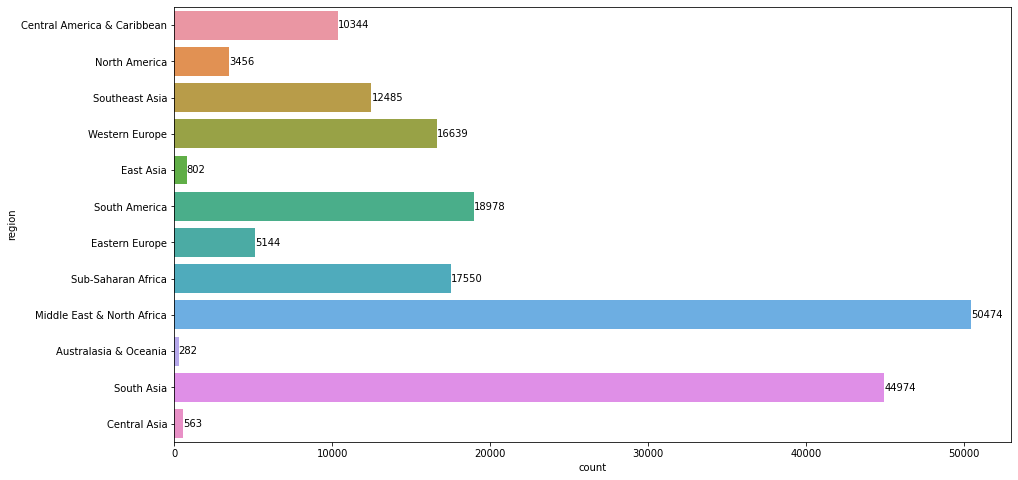

In [13]:
plt.figure(figsize = (15,8))
ax = sns.countplot(y=data_sub['region'])
ax.bar_label(ax.containers[0])

# this plot doesn't take into account the number of attempts of terrorist attacks

[Text(0, 0, '11594'),
 Text(0, 0, '3986'),
 Text(0, 0, '14642'),
 Text(0, 0, '18667'),
 Text(0, 0, '932'),
 Text(0, 0, '21843'),
 Text(0, 0, '5803'),
 Text(0, 0, '20716'),
 Text(0, 0, '57431'),
 Text(0, 0, '313'),
 Text(0, 0, '50189'),
 Text(0, 0, '607')]

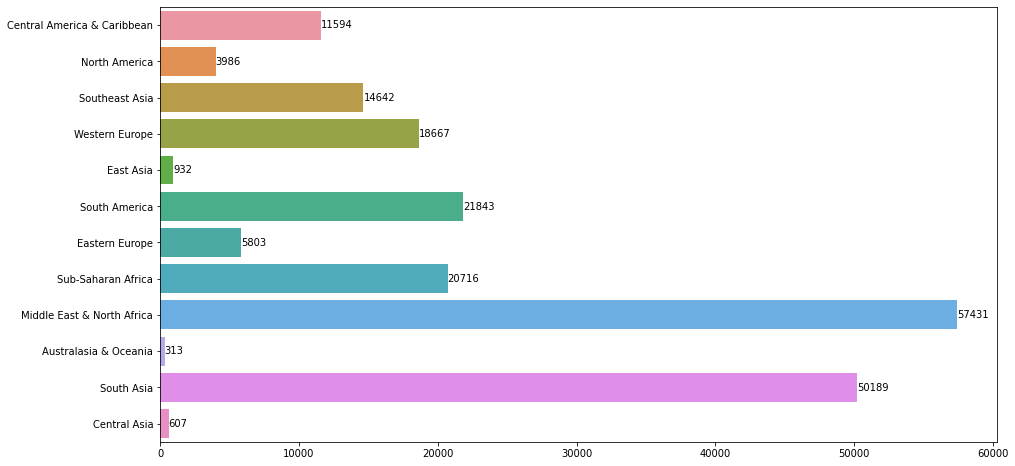

In [14]:
plt.figure(figsize = (15,8))
ax = sns.barplot(y=regions, x=attempts)
ax.bar_label(ax.containers[0])

# this plot takes into account the number of attempts of terrorist attacks

In [15]:
# pretty much the same results if either plot is used
# stick to sns.countplot method for simplicity

# the regions 'Middle East & North Africa' and 'South Asia'
# are the hot zones of terrorism

# the regions 'Australia & Oceania' and 'East Asia' followed by 'North America'
# are the ones with the least terrorist attacks

In [16]:
# we can plot 100 cities of each region

def event_region(region):
    ey = data_sub[data_sub['region'] == region]
    plt.figure(figsize = (15,10))
    ax = sns.countplot(y=ey['city'][0:100])
    ax.bar_label(ax.containers[0])
    return ax

interact(event_region, region=regions);

interactive(children=(Dropdown(description='region', options=('Central America & Caribbean', 'North America', …

[Text(0, 0, '651'),
 Text(0, 0, '471'),
 Text(0, 0, '568'),
 Text(0, 0, '473'),
 Text(0, 0, '581'),
 Text(0, 0, '740'),
 Text(0, 0, '923'),
 Text(0, 0, '1319'),
 Text(0, 0, '1526'),
 Text(0, 0, '2662'),
 Text(0, 0, '2662'),
 Text(0, 0, '2586'),
 Text(0, 0, '2544'),
 Text(0, 0, '2870'),
 Text(0, 0, '3495'),
 Text(0, 0, '2915'),
 Text(0, 0, '2860'),
 Text(0, 0, '3183'),
 Text(0, 0, '3721'),
 Text(0, 0, '4324'),
 Text(0, 0, '3887'),
 Text(0, 0, '4683'),
 Text(0, 0, '5071'),
 Text(0, 0, '3456'),
 Text(0, 0, '3081'),
 Text(0, 0, '3058'),
 Text(0, 0, '3197'),
 Text(0, 0, '934'),
 Text(0, 0, '1395'),
 Text(0, 0, '1814'),
 Text(0, 0, '1906'),
 Text(0, 0, '1333'),
 Text(0, 0, '1278'),
 Text(0, 0, '1166'),
 Text(0, 0, '2017'),
 Text(0, 0, '2758'),
 Text(0, 0, '3242'),
 Text(0, 0, '4805'),
 Text(0, 0, '4721'),
 Text(0, 0, '4826'),
 Text(0, 0, '5076'),
 Text(0, 0, '8522'),
 Text(0, 0, '12036'),
 Text(0, 0, '16903'),
 Text(0, 0, '14965'),
 Text(0, 0, '13587'),
 Text(0, 0, '10900')]

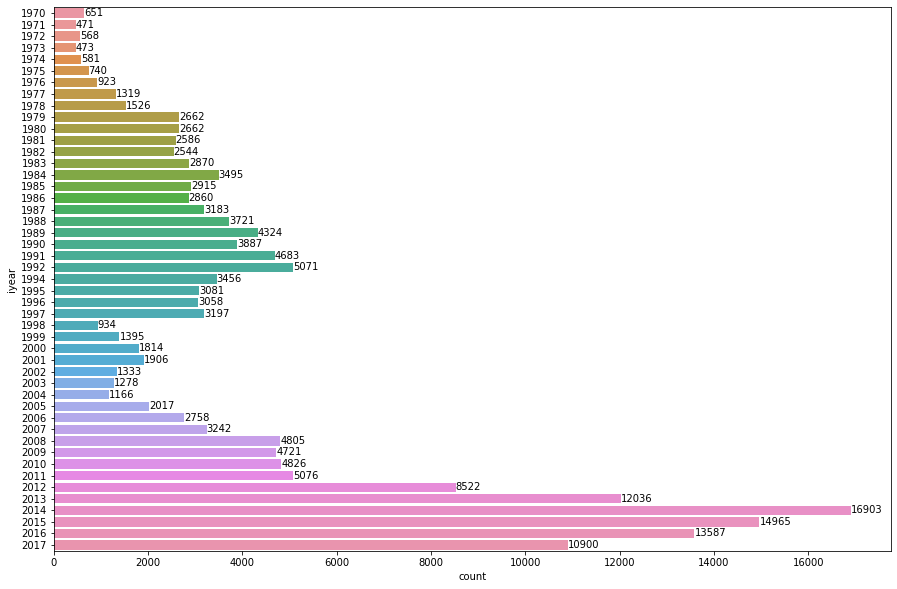

In [17]:
years = data_sub['iyear'].unique()
plt.figure(figsize = (15,10))
ax = sns.countplot(y=data_sub['iyear'])
ax.bar_label(ax.containers[0])

In [21]:
# we can see that the year 2014 is highest in attacks
# visualize regions of each year

def event_year(year):
    ey = data_sub[data_sub['iyear'] == year]
    return sns.countplot(y=ey['region'])

interact(event_year, year=years);

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…